## Depression Analysis

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [342]:
df = pd.read_csv("C:/Users/Himanshi Agarwal/OneDrive/Desktop/sem6/ML/depression.csv")
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,Crystal Brooks,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Employed,112160.42,Low,Unhealthy,Fair,No,No,No,No,Yes
1,Roger Webster,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Employed,62647.39,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,Brian Smith,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,Michelle Morrow,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,Erin Russell,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,16474.33,High,Moderate,Poor,No,No,No,Yes,Yes


In [343]:
df.describe()

,Age,Number of Children,Income
count,523.000000,580.000000,593.000000
mean,48.910134,1.256897,51553.024047
std,17.678091,1.207863,40311.921648
min,18.000000,0.000000,12.200000
25%,35.000000,0.000000,22692.570000
50%,49.000000,1.000000,40257.610000
75%,65.000000,2.000000,76121.230000
max,80.000000,4.000000,205580.460000


## Removing Irrelevant Columns

### Dropped 'Name' column from the dataset as it is unnecessary for analysis.

In [345]:
df = df.drop(["Name"], axis=1)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Employed,112160.42,Low,Unhealthy,Fair,No,No,No,No,Yes
1,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Employed,62647.39,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,16474.33,High,Moderate,Poor,No,No,No,Yes,Yes


## Checking for any duplicate rows in dataset and removing them if there are any

In [347]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (599, 16)


In [348]:
duplicate = df[df.duplicated()]
print("Number of Duplicate rows : ", duplicate.shape)

Number of Duplicate rows :  (0, 16)


## Checking for Null values in Dataset and Removing it

In [350]:
print(df.isnull().sum())

Age                             76
Marital Status                   0
Education Level                  0
Number of Children              19
Smoking Status                   0
Physical Activity Level          0
Employment Status                0
Income                           6
Alcohol Consumption              0
Dietary Habits                   0
Sleep Patterns                   0
History of Mental Illness        0
History of Substance Abuse       0
Family History of Depression     0
Chronic Medical Conditions       0
Depression Indicator             0
dtype: int64


In [351]:
df = df.dropna()
df.count()

Age                             501
Marital Status                  501
Education Level                 501
Number of Children              501
Smoking Status                  501
Physical Activity Level         501
Employment Status               501
Income                          501
Alcohol Consumption             501
Dietary Habits                  501
Sleep Patterns                  501
History of Mental Illness       501
History of Substance Abuse      501
Family History of Depression    501
Chronic Medical Conditions      501
Depression Indicator            501
dtype: int64

In [352]:
print(df.isnull().sum())

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Depression Indicator            0
dtype: int64


## Detecting Outliers in Dataset

<Axes: xlabel='Income'>

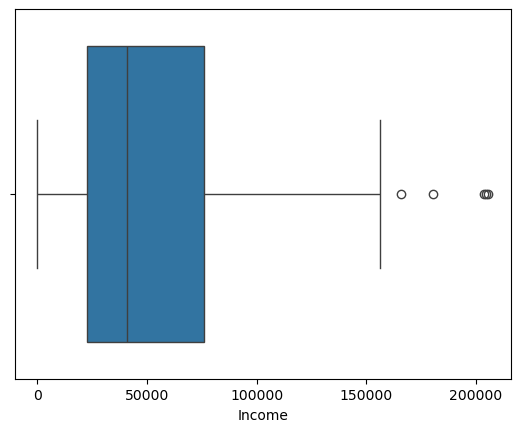

In [354]:
sns.boxplot(x=df['Income'])

### Interpretation: There are many outliers in 'Income' column.

In [356]:
df.shape # Number of rows before removing outliers

(501, 16)

In [357]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [358]:
for col in df.columns:
    if(col=="Age" or col=="Number of Children" or col=="Income"):
        df = remove_outliers(df, col)
        

### All outliers from all the columns has been removed.

In [360]:
df.shape  # Number of rows after removing outliers

(496, 16)

## Plotting the Dataset

### Histogram

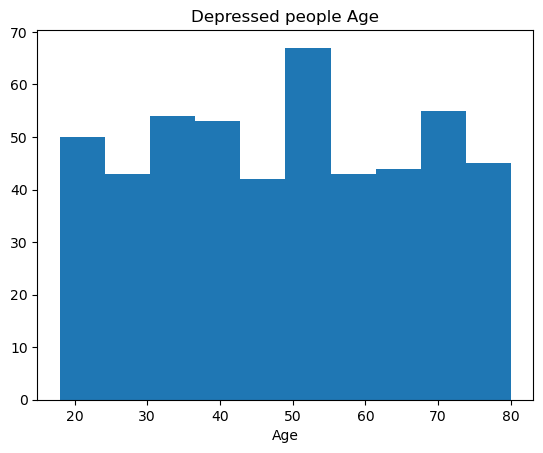

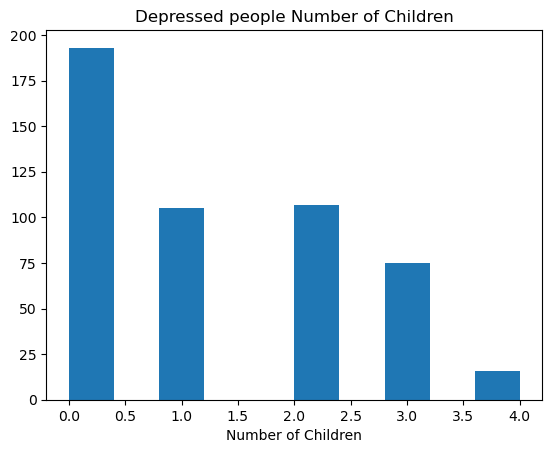

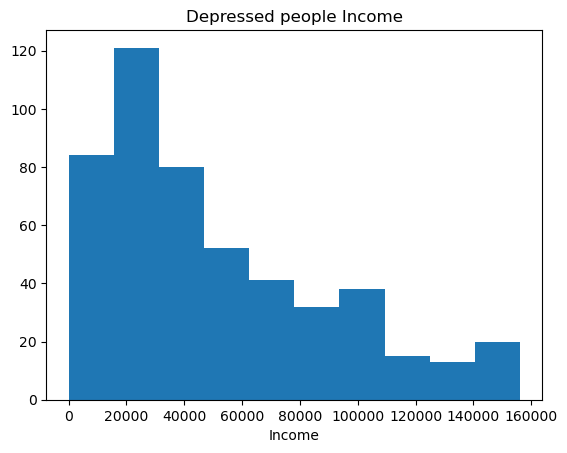

In [363]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Depressed people '+str(i))
        plt.hist(col)
        plt.show()

### Interpretation: The dataset shows that individuals aged 50 to 55 experience the highest prevalence of depression. This age group may require focused attention for mental health interventions.

### Heatmap

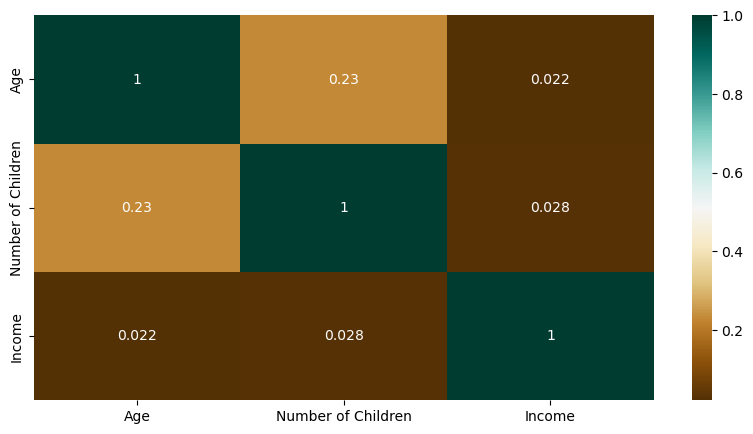

In [366]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Interpretation: 

#### Age has a moderate positive correlation (0.23) with the number of children, suggesting that older individuals in the dataset are more likely to have children.

#### Income has very weak correlations with both Age (0.059) and Number of Children (0.02), indicating minimal or no relationship between these variables.

#### All diagonal values are 1, as a variable is perfectly correlated with itself.


## Performing Label Encoding and Dummy Encoding

In [369]:
def label_encode(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(f"Label encoding applied to '{column}'. Unique values mapped: {dict(enumerate(le.classes_))}")
    return data


df_encoded = label_encode(df, 'Smoking Status')
df_encoded.head()

Label encoding applied to 'Smoking Status'. Unique values mapped: {0: 'Current', 1: 'Former', 2: 'Non-smoker'}


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
2,52.0,Married,High School,1.0,2,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,2,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
5,55.0,Married,Associate Degree,2.0,2,Moderate,Employed,38951.25,Low,Unhealthy,Poor,No,No,No,No,No
6,41.0,Divorced,High School,1.0,2,Moderate,Employed,31985.33,Low,Unhealthy,Good,No,No,Yes,Yes,Yes
7,52.0,Widowed,Associate Degree,0.0,1,Moderate,Unemployed,24466.72,Low,Unhealthy,Fair,Yes,Yes,No,No,Yes


In [370]:
def dummy_encode(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=True)
    print(f"Dummy encoding applied to '{column}'. New columns created:\n{list(encoded_data.columns)}")
    return encoded_data

df_encoded = dummy_encode(df, 'Physical Activity Level')
df_encoded.head()

Dummy encoding applied to 'Physical Activity Level'. New columns created:
['Age', 'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status', 'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions', 'Depression Indicator', 'Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary']


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator,Physical Activity Level_Moderate,Physical Activity Level_Sedentary
2,52.0,Married,High School,1.0,2,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No,True,False
3,29.0,Single,Associate Degree,0.0,2,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes,False,True
5,55.0,Married,Associate Degree,2.0,2,Employed,38951.25,Low,Unhealthy,Poor,No,No,No,No,No,True,False
6,41.0,Divorced,High School,1.0,2,Employed,31985.33,Low,Unhealthy,Good,No,No,Yes,Yes,Yes,True,False
7,52.0,Widowed,Associate Degree,0.0,1,Unemployed,24466.72,Low,Unhealthy,Fair,Yes,Yes,No,No,Yes,True,False


## Distribution of nominal variables using count plot

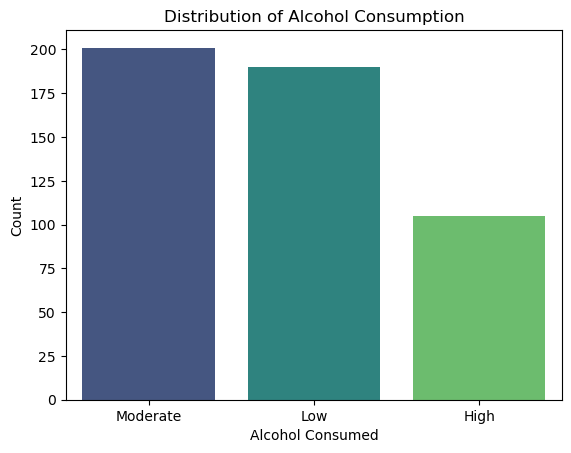

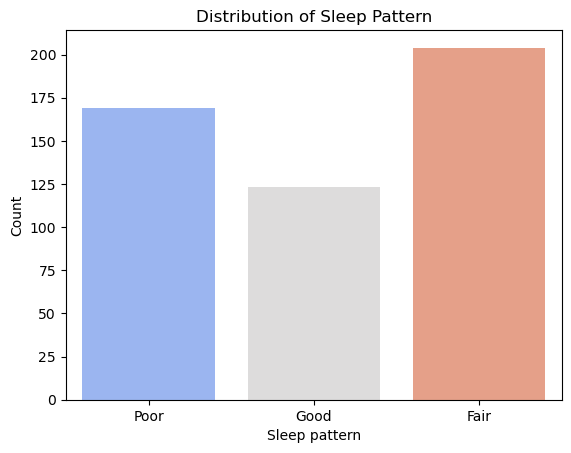

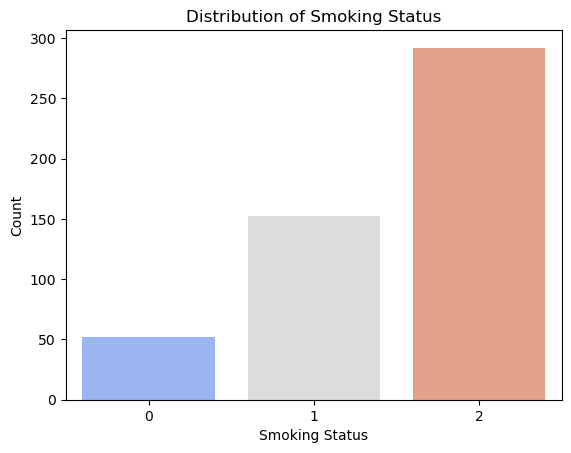

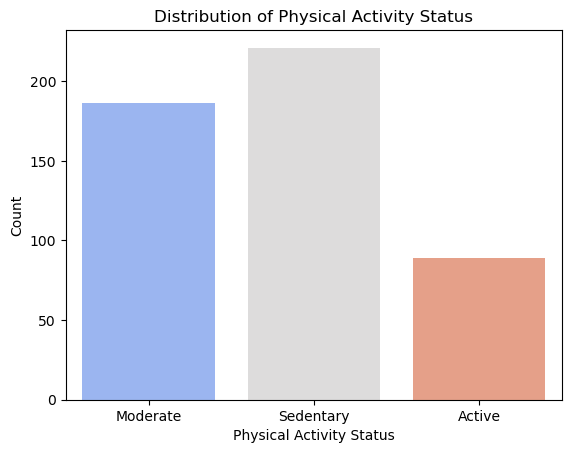

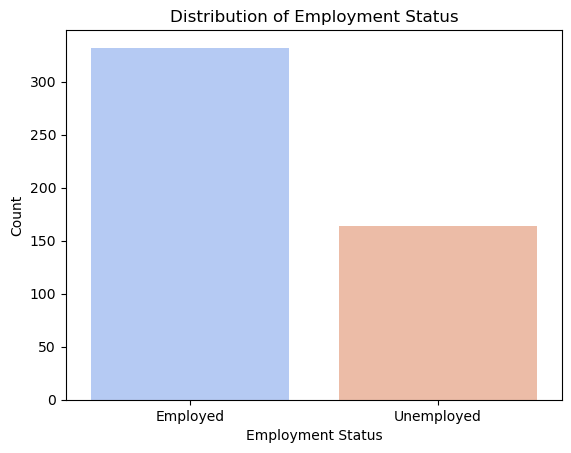

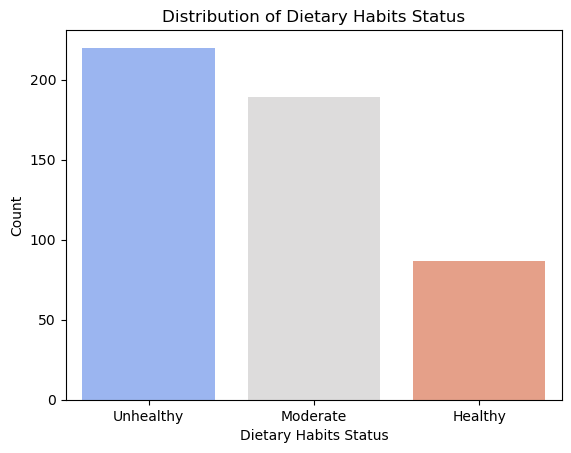

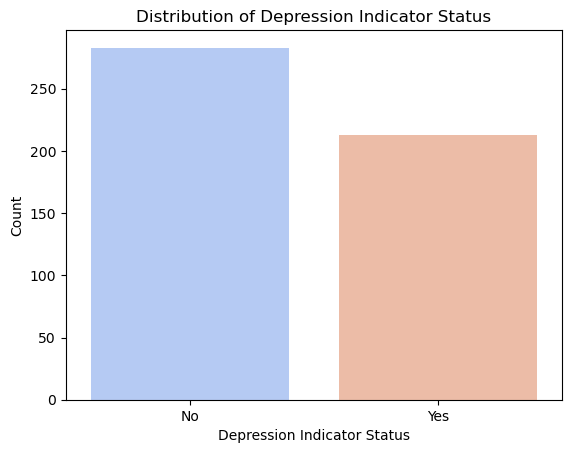

In [372]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data=df, x='Alcohol Consumption', palette='viridis')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumed')
plt.ylabel('Count')
plt.show()
print()

sns.countplot(data=df, x='Sleep Patterns', palette='coolwarm')
plt.title('Distribution of Sleep Pattern')
plt.xlabel('Sleep pattern')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Smoking Status', palette='coolwarm')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Physical Activity Level', palette='coolwarm')
plt.title('Distribution of Physical Activity Status')
plt.xlabel('Physical Activity Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Employment Status', palette='coolwarm')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Dietary Habits', palette='coolwarm')
plt.title('Distribution of Dietary Habits Status')
plt.xlabel('Dietary Habits Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Depression Indicator', palette='coolwarm')
plt.title('Distribution of Depression Indicator Status')
plt.xlabel('Depression Indicator Status')
plt.ylabel('Count')
plt.show()

### Scatter Plot

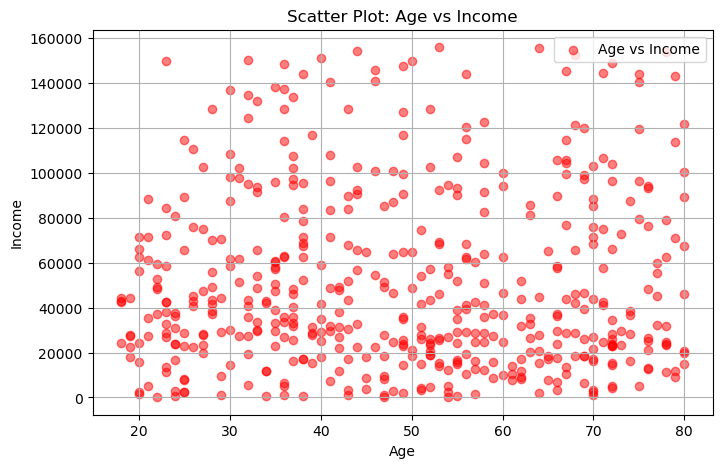

In [374]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Income'], color='red', alpha=0.5, label='Age vs Income')
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation: There is no correlation between Age and Income.

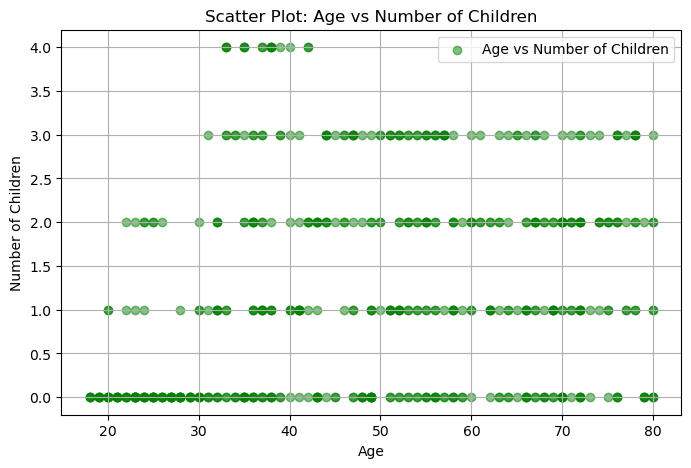

In [376]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Number of Children'], color='green', alpha=0.5, label='Age vs Number of Children')
plt.title('Scatter Plot: Age vs Number of Children')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.grid(True)
plt.legend()
plt.show()

### Box Plot

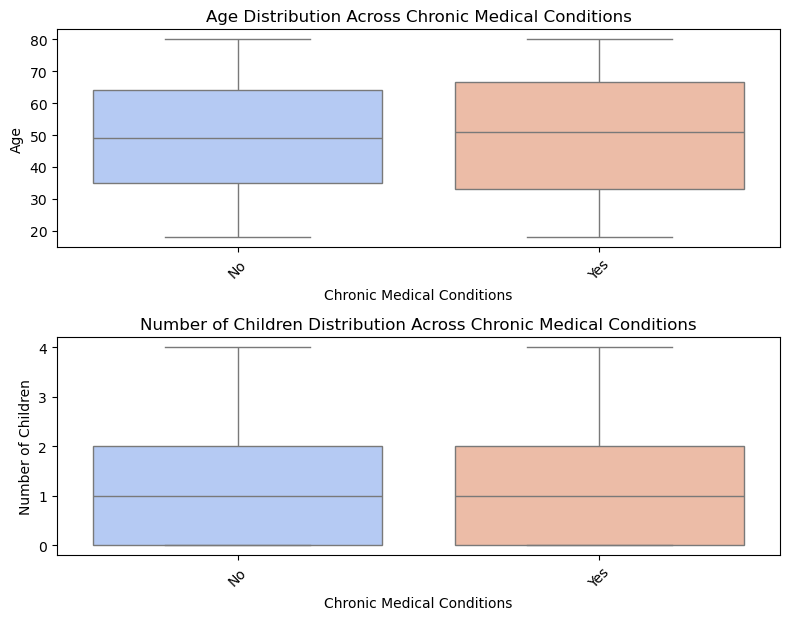

In [378]:
variables = ['Age', 'Number of Children']
             
plt.figure(figsize=(8, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 1, i)
    sns.boxplot(data=df, x='Chronic Medical Conditions', y=var, palette='coolwarm')
    plt.title(f'{var} Distribution Across Chronic Medical Conditions', fontsize=12)
    plt.xlabel('Chronic Medical Conditions')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()

### Interpretation: There are no outliers in these box plots as all the outliers has beeen removed already.

### Voilin Plot

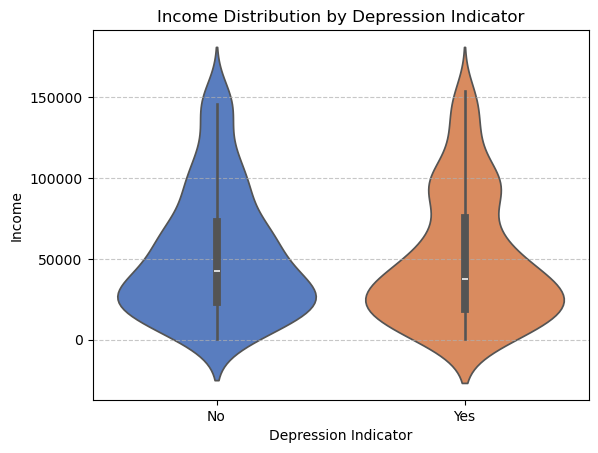

In [381]:
violin_data = df[['Income', 'Depression Indicator']].dropna()

sns.violinplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted')

plt.title('Income Distribution by Depression Indicator')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This violin plot shows income distribution differs between people with and without depression. Those without depression have a wider range of income, with a slightly higher median income. Those with depression have a narrower income range, suggesting potential financial challenges.

### Swarm Plot

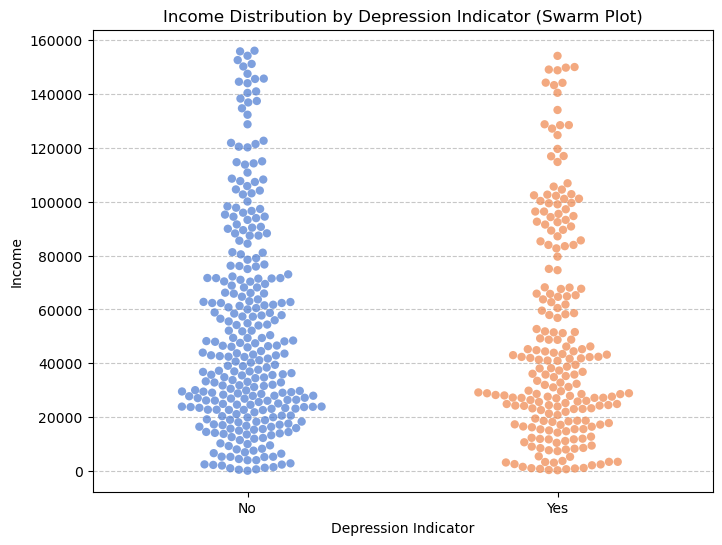

In [384]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted', size=6, alpha=0.7)

plt.title('Income Distribution by Depression Indicator (Swarm Plot)')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This swarm plot shows a clear income difference between people with and without depression. Those without depression have a wider range of income, often higher, while those with depression have a narrower range, often lower.

# KNN Classifier

## Fitting the Model

### 1. Converting Categorical data into numerical

In [389]:
education = {"PhD" : 0, "Bachelor's Degree" : 1, "High School" : 2, "Associate Degree" : 3, "Master's Degree" : 4}
smoking = {"Current" : 0,  "Non-smoker" : 1, "Former" : 2}
physical_activity = {"Active" : 0,  "Sedentary" : 1, "Moderate" : 2}
marital_status = {"Married" : 0,  "Single" : 1, "Widowed" : 2, "Divorced" :3}
dietary = {"Healthy" : 0,  "Moderate" : 1, "Unhealthy" : 2}
sleep_pattern = {"Fair" : 0,  "Poor" : 1, "Good" : 2}
alcohol = {"High" : 0,  "Low" : 1, "Moderate" : 2}
employment = {"Employed" : 0, "Unemployed" : 1}
mental_illness= {"Yes" : 0, "No" : 1}
abuse = {"Yes" : 0, "No": 1}
family_history = {"Yes" : 0, "No" : 1}
chronic = {"Yes" : 0, "No" : 1}
depression = {"Yes" : 0, "No" : 1}

df['Education Level'] = df['Education Level'].replace(education)
df['Smoking Status'] = df['Smoking Status'].replace(smoking)
df['Physical Activity Level'] = df['Physical Activity Level'].replace(physical_activity)
df['Marital Status'] = df['Marital Status'].replace(marital_status)
df['Dietary Habits'] = df['Dietary Habits'].replace(dietary)
df['Sleep Patterns'] = df['Sleep Patterns'].replace(sleep_pattern)
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace(alcohol)
df['Employment Status'] = df['Employment Status'].replace(employment)
df['History of Mental Illness'] = df['History of Mental Illness'].replace(mental_illness)
df['History of Substance Abuse'] = df['History of Substance Abuse'].replace(abuse)
df['Family History of Depression'] = df['Family History of Depression'].replace(family_history)
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].replace(chronic)
df['Depression Indicator'] = df['Depression Indicator'].replace(depression)

df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
2,52.0,0,2,1.0,2,2,0,26084.99,2,2,1,1,0,0,1,1
3,29.0,1,3,0.0,2,1,1,1153.86,1,2,1,1,0,1,1,0
5,55.0,0,3,2.0,2,2,0,38951.25,1,2,1,1,1,1,1,1
6,41.0,3,2,1.0,2,2,0,31985.33,1,2,2,1,1,0,0,0
7,52.0,2,3,0.0,1,2,1,24466.72,1,2,0,0,0,1,1,0


## Pair Plot

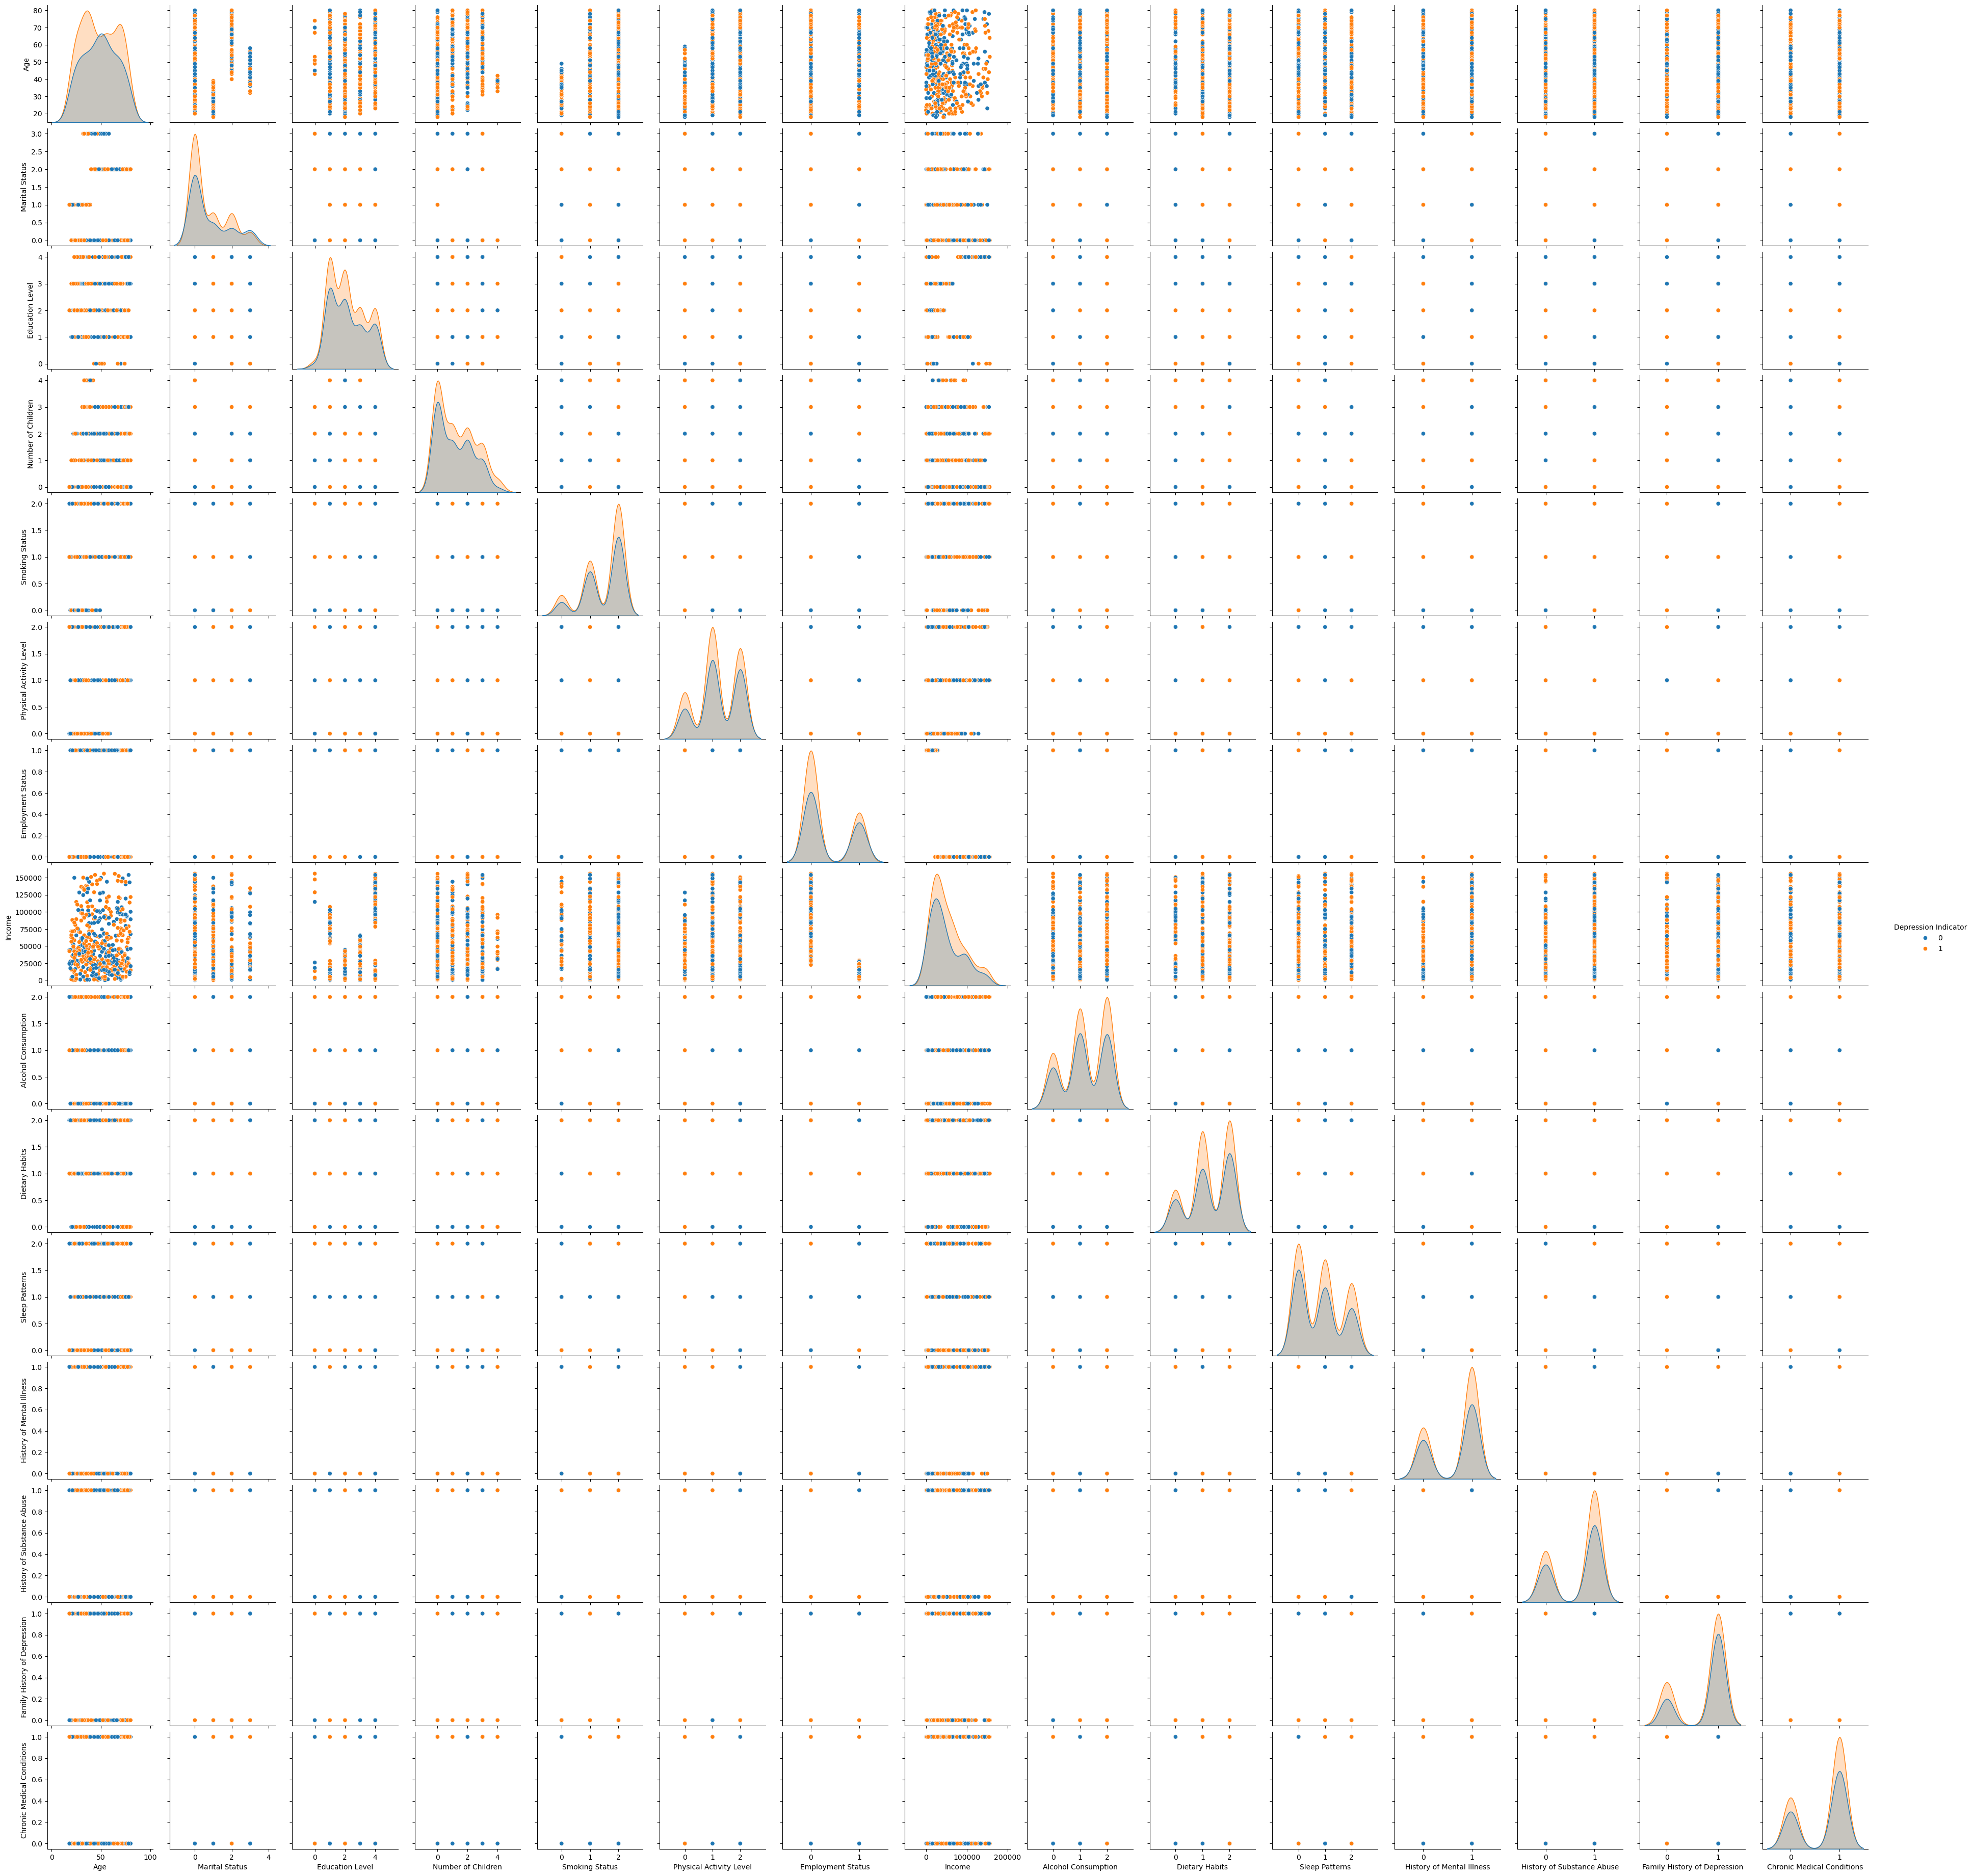

In [457]:
sns.pairplot(data=df,hue='Depression Indicator')
plt.show()

## Spliting the dataset into Dependent and Independent Variables

In [391]:
x = df.drop('Depression Indicator', axis=1)
y = df['Depression Indicator']

## Split the value to train and test

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.20, random_state=38, stratify = y)

## Implementing KNN Model with K = 7

In [396]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [397]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1]


              precision    recall  f1-score   support

           0       0.53      0.53      0.53        43
           1       0.65      0.65      0.65        57

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

Accuracy:  0.6


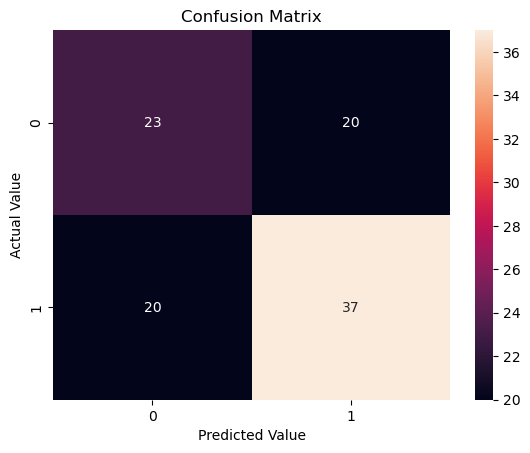

In [398]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

#### Observation: There were 600 records in the dataset, out of which 80% of the data was given for training the model and 20% of the data, i.e., 120 records were given for testing the model. And out of 120 records, 40% i.e. 48 records were misclassified. 

## Implementing KNN Model with K = 3

In [401]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [402]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1]


              precision    recall  f1-score   support

           0       0.55      0.63      0.59        43
           1       0.69      0.61      0.65        57

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.63      0.62      0.62       100

Accuracy:  0.62


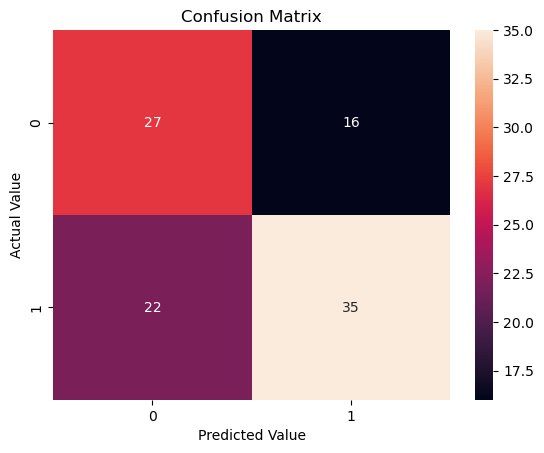

In [403]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

#### Observation: There were 600 records in the dataset, out of which 80% of the data was given for training the model and 20% of the data, i.e., 120 records were given for testing the model. And out of 120 records, 38% i.e. 45 records were misclassified. 

## Choosing K value using Error Rate Plot

In [463]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

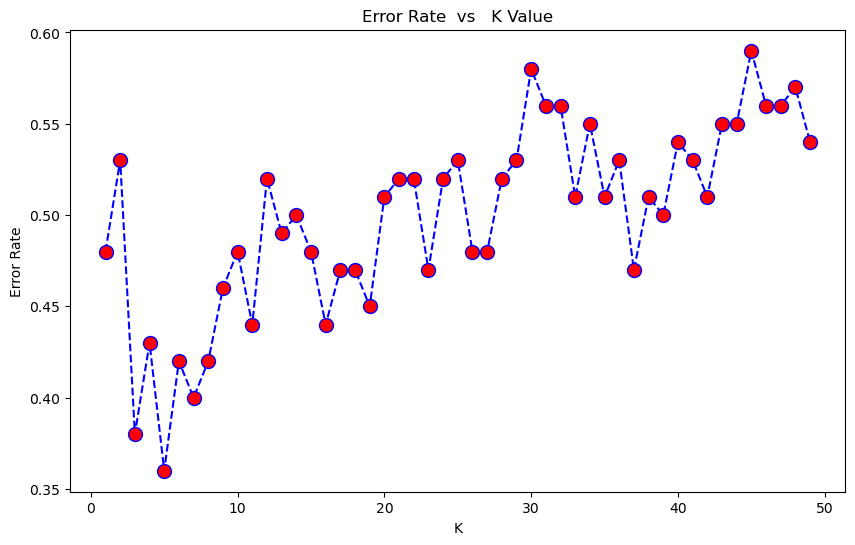

In [464]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate  vs   K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Observation : As error rate is lowest at 5, so taking K=5

## Implementing KNN Model with K = 5

In [409]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [410]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1]


              precision    recall  f1-score   support

           0       0.59      0.53      0.56        43
           1       0.67      0.72      0.69        57

    accuracy                           0.64       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.64      0.64      0.64       100

Accuracy:  0.64


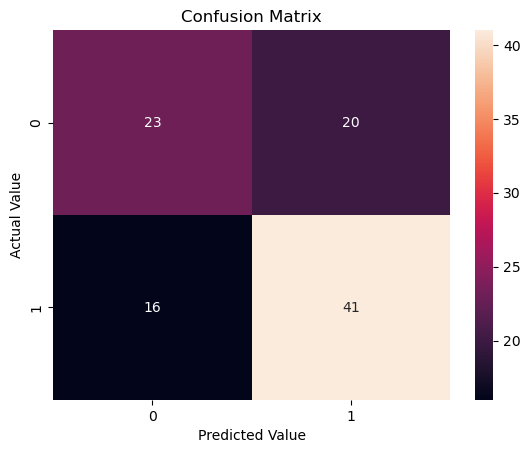

In [411]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

#### Observation: There were 600 records in the dataset, out of which 80% of the data was given for training the model and 20% of the data, i.e., 120 records were given for testing the model. And out of 120 records, 36% i.e. 43 records were misclassified. 

# Hence, with K = 5 we get the model with the best accuracy as it has least number of misclassification.